In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
from datetime import timedelta
import pandas as pd

# Read takehome_user_engagement.csv
df1=pd.read_csv('takehome_user_engagement.csv')
df1.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null object
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [3]:
# Convert time_stamp to datetime format and extract its date
df1['time_stamp']=pd.to_datetime(df1.time_stamp)
df1['date']=df1.time_stamp.apply(lambda x:x.date())

In [4]:
# Print info of df1
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 4 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
date          207917 non-null object
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 6.3+ MB


In [5]:
def is_adopted_user(date_series):
    """This function sorts input date series and determines if there are three separate days in at least one seven day period"""
    dates=date_series.sort_values()
    for i in range(len(dates.values)-2):
        if dates.values[i+2]-dates.values[i] < timedelta(8):
            return 1
    return 0            

In [6]:
def adopted_user(groupby):
    """This function creates a dataframe with two columns; unique values of user ids, and if each use is an adopted user"""
    userid_list = []
    adopteduser_list = []
    for groupname,group in groupby:
        userid_list.append(groupname)
        adopteduser_list.append(is_adopted_user(group['date']))
    dataframe = pd.DataFrame(dict(zip(['user_id','adopted_user'],[userid_list,adopteduser_list])))
    return dataframe

In [7]:
# Run adopted_user on df1.groupby('user_id')
df2=adopted_user(df1.groupby('user_id'))

In [8]:
# Print df2.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 2 columns):
user_id         8823 non-null int64
adopted_user    8823 non-null int64
dtypes: int64(2)
memory usage: 137.9 KB


In [9]:
# Read 'takehome_users.csv' and save it in df3
df3=pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")

In [10]:
# Print df3.info()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
object_id                     12000 non-null int64
creation_time                 12000 non-null object
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null float64
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [11]:
# Print unique values of user ids in df3
df3.object_id.nunique()

12000

In [12]:
# there are more unique value of user ids in df3 than df2. This is because there is no record of logins for some users 
# in the ‘takehome_user_engagement.csv’ file.

# Merge df3 and df2
df3=pd.merge(df3,df2,left_on='object_id',right_on='user_id')

In [13]:
# drop useless features
df3.drop(['email','name','last_session_creation_time','user_id','object_id'],axis=1,inplace=True)

In [14]:
# Print the first ten rows of df3
df3.head(10)

,creation_time,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,2014-04-22 03:53:30,GUEST_INVITE,1,0,11,10803.0,0
1,2013-11-15 03:45:04,ORG_INVITE,0,0,1,316.0,1
2,2013-03-19 23:14:52,ORG_INVITE,0,0,94,1525.0,0
3,2013-05-21 08:09:28,GUEST_INVITE,0,0,1,5151.0,0
4,2013-01-17 10:14:20,GUEST_INVITE,0,0,193,5240.0,0
5,2013-12-17 03:37:06,GUEST_INVITE,0,0,197,11241.0,0
6,2012-12-16 13:24:32,SIGNUP,0,1,37,NaN,0
7,2013-01-16 22:08:03,ORG_INVITE,1,1,318,4143.0,1
8,2013-12-26 03:55:54,SIGNUP,0,0,69,NaN,0
9,2014-03-30 16:19:38,ORG_INVITE,0,0,254,11204.0,0


In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 7 columns):
creation_time                 8823 non-null object
creation_source               8823 non-null object
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
adopted_user                  8823 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 551.4+ KB


In [16]:
# Create three new columns which contain day, month, and year of creation time
df3['creation_time_day']=pd.to_datetime(df3.creation_time).apply(lambda x:x.day)
df3['creation_time_month']=pd.to_datetime(df3.creation_time).apply(lambda x:x.month)
df3['creation_time_year']=pd.to_datetime(df3.creation_time).apply(lambda x:x.year)

# Remove creation time 
del df3['creation_time']

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 9 columns):
creation_source               8823 non-null object
opted_in_to_mailing_list      8823 non-null int64
enabled_for_marketing_drip    8823 non-null int64
org_id                        8823 non-null int64
invited_by_user_id            4776 non-null float64
adopted_user                  8823 non-null int64
creation_time_day             8823 non-null int64
creation_time_month           8823 non-null int64
creation_time_year            8823 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 689.3+ KB


In [69]:
def barplot(feature,figsize=(12,8),sort=True):
    """ This function creates the bar plot of adopted user ratio across all leveles of the input feature"""
    
    if sort:
        df3.groupby(feature)['adopted_user'].mean().sort_values().plot.bar(figsize=figsize)
    else:
        df3.groupby(feature)['adopted_user'].mean().plot.bar(figsize=figsize)
    plt.xticks(rotation='horizontal',fontsize=14)
    plt.xlabel('{}'.format(feature),fontsize=20)
    plt.ylabel('ratio of adopted_user',fontsize=20)
    plt.title('ratio of adopted users across all levels of {}'.format(feature),fontsize=15)
    plt.show()

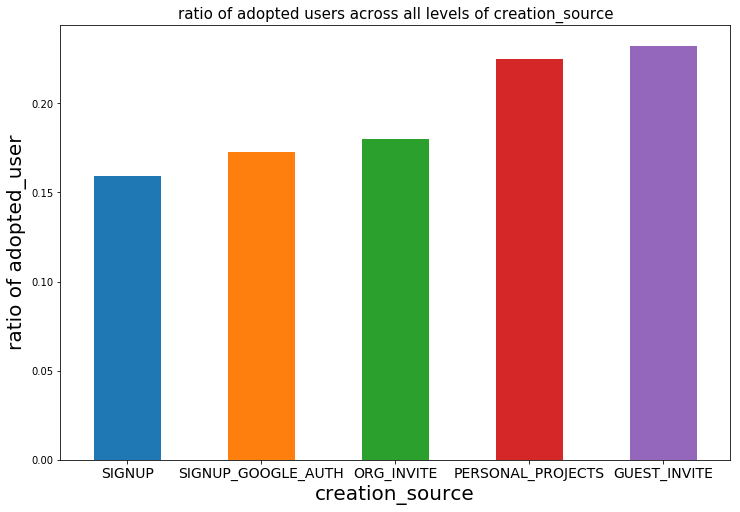

In [70]:
barplot('creation_source')

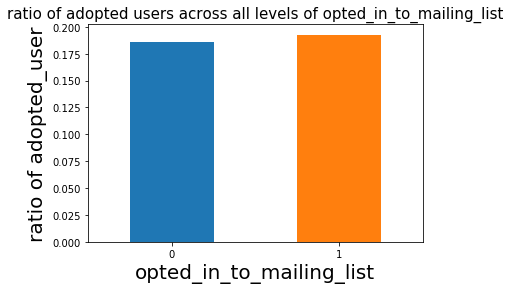

In [57]:
barplot('opted_in_to_mailing_list',(6,4))

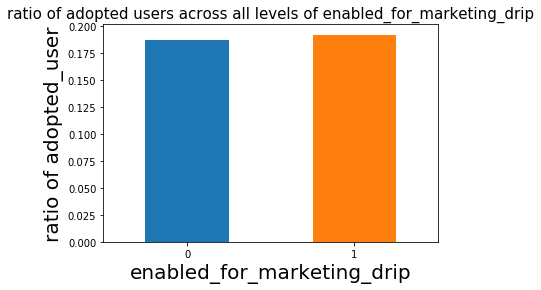

In [58]:
barplot('enabled_for_marketing_drip',(6,4))

In [59]:
df3.org_id.nunique()

417

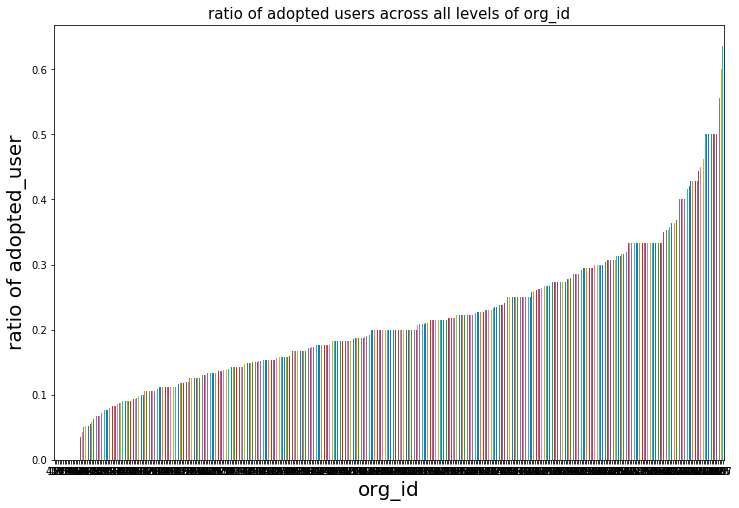

In [60]:
barplot('org_id')

In [61]:
df3.invited_by_user_id.nunique()

2229

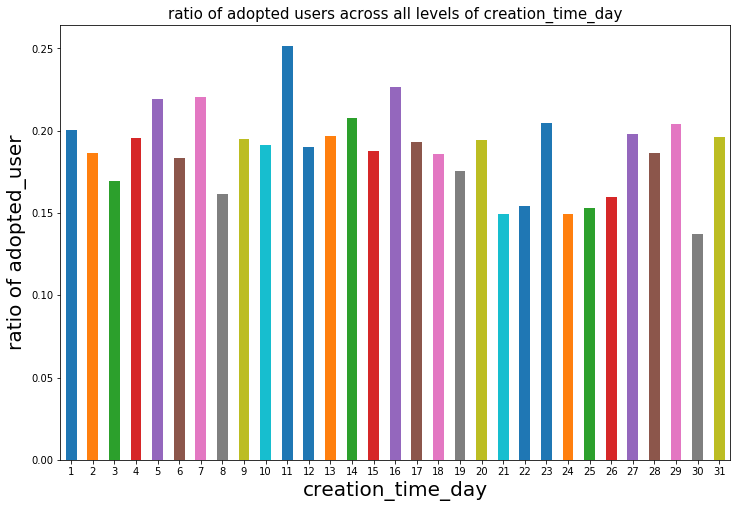

In [62]:
barplot('creation_time_day',sort=False)

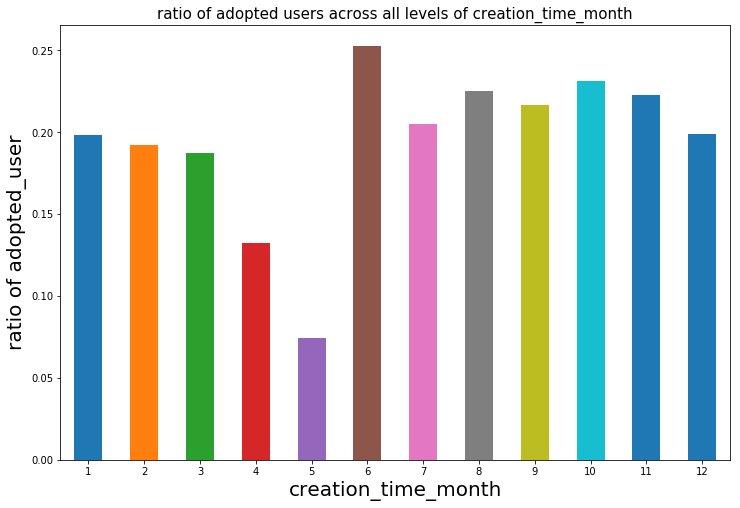

In [63]:
barplot('creation_time_month',sort=False)

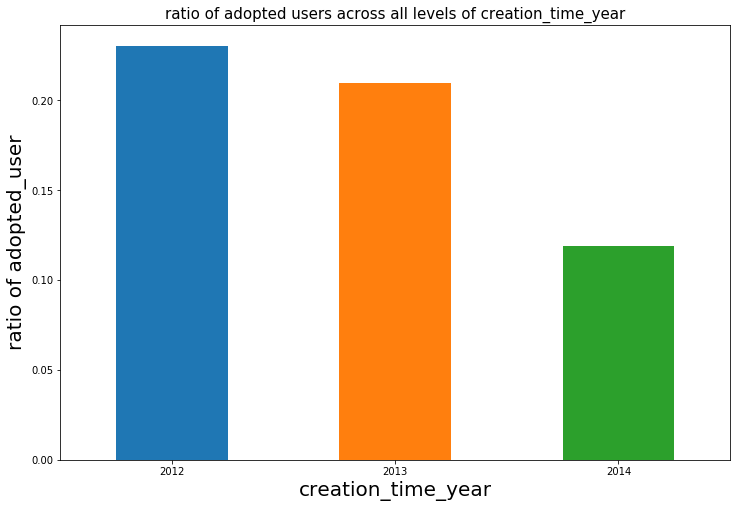

In [64]:
barplot('creation_time_year',sort=False)